<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Assignment_6FraudDetectionComparativeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  

       distan

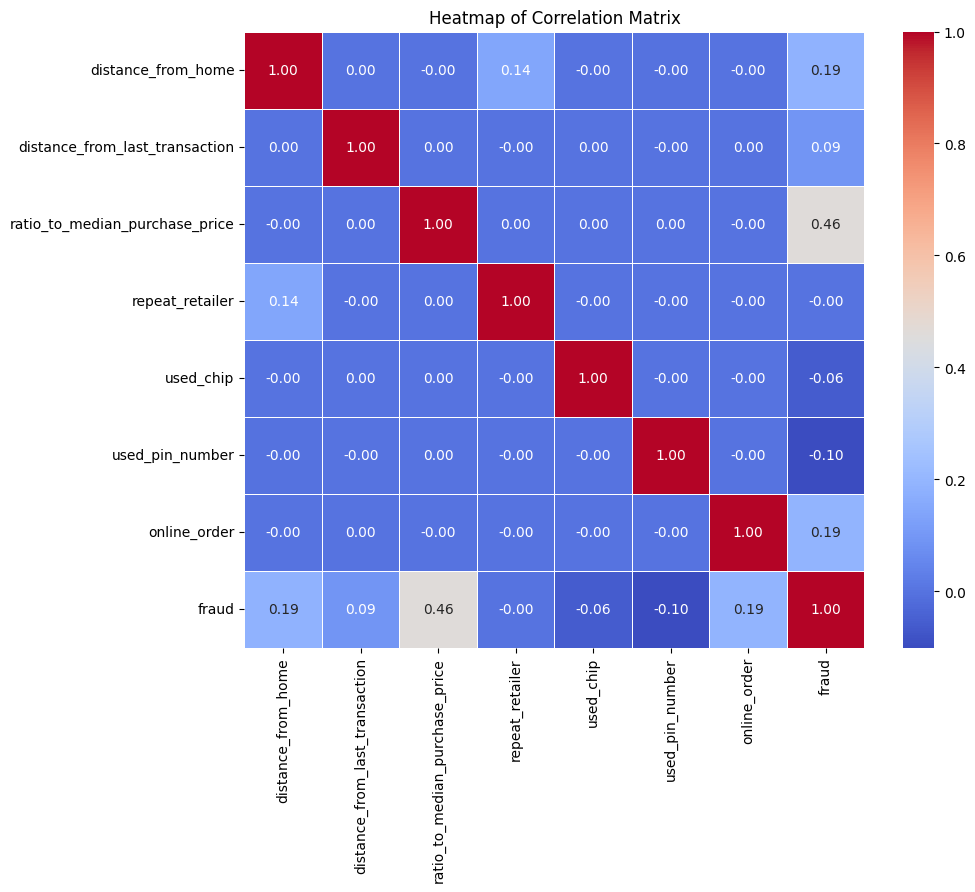


--- Box Plots for Each Numeric Column ---


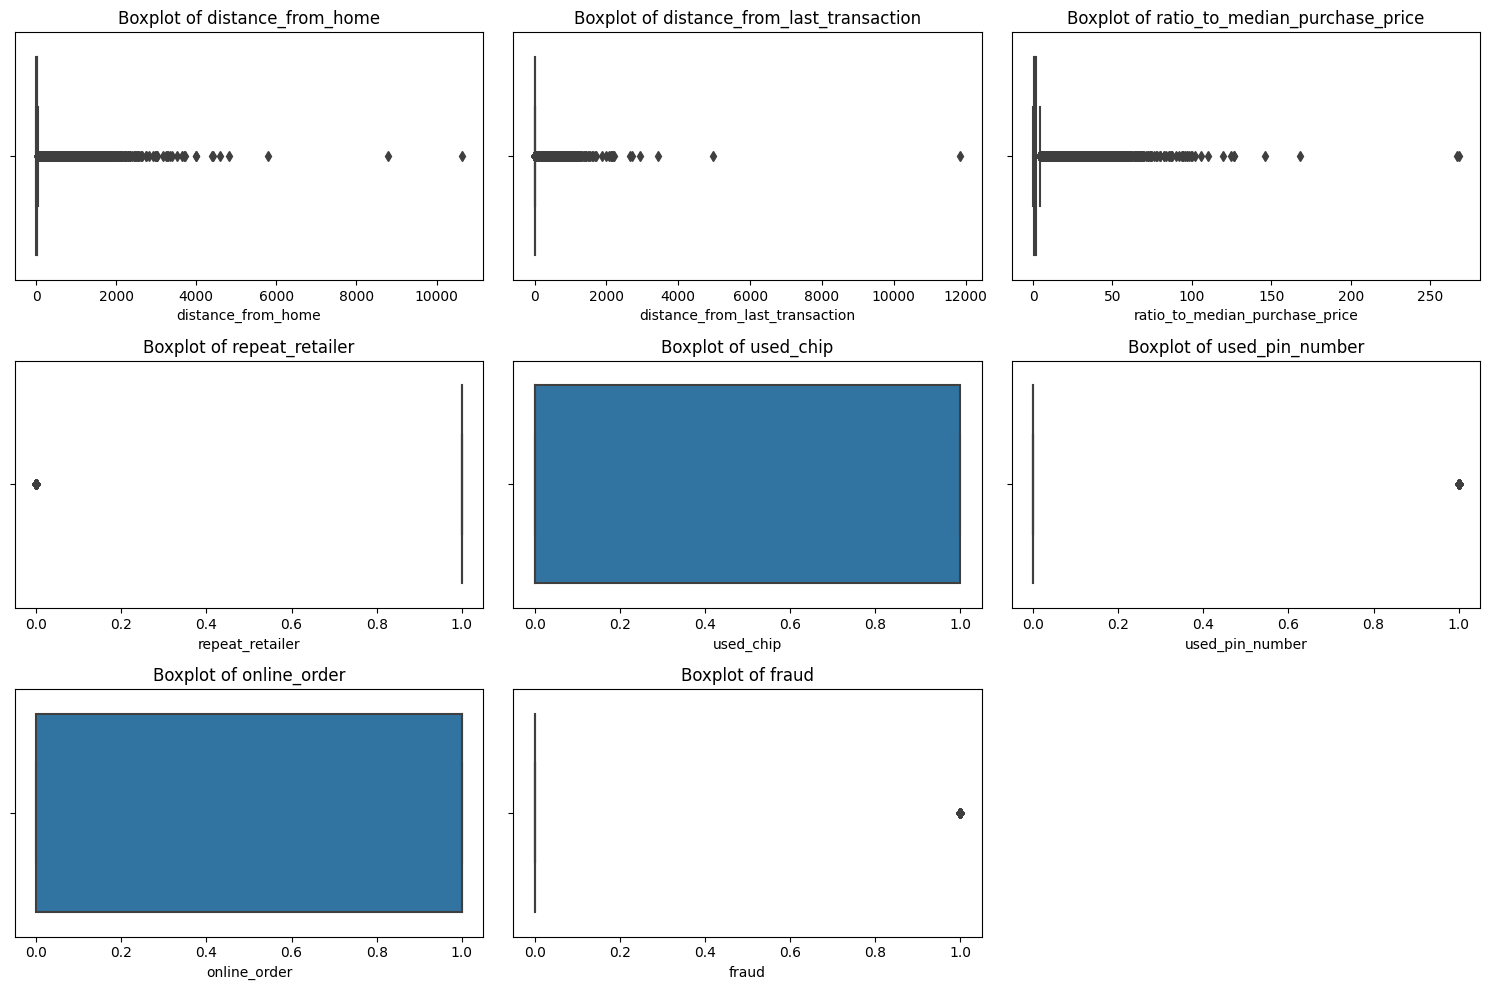

Accuracy for Random Forest Model:  1.0000
Random Forest - Recall: 0.9999
Random Forest - Precision: 1.0000
Confusion Matrix for Random Forest Model:
[[182557      0]
 [     2  17441]]


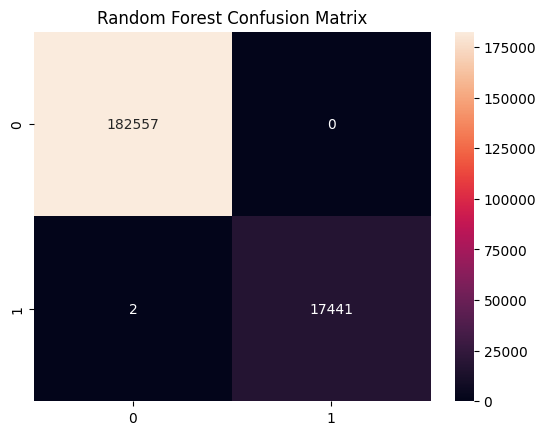

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Accuracy for Decision Tree: 0.9794
Decision Tree - Recall: 0.9056
Decision Tree - Precision: 0.8643
Confusion Matrix for Decision Tree:
[[180076   2481]
 [  1646  15797]]


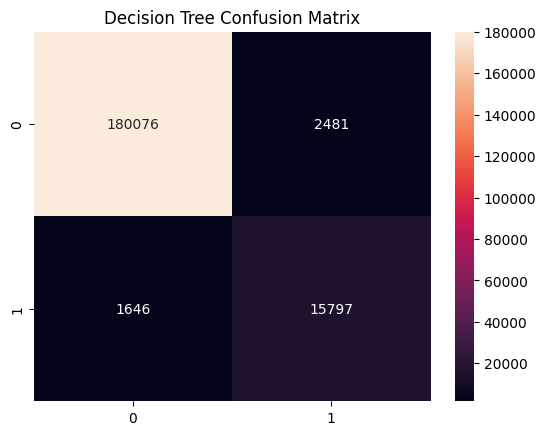

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



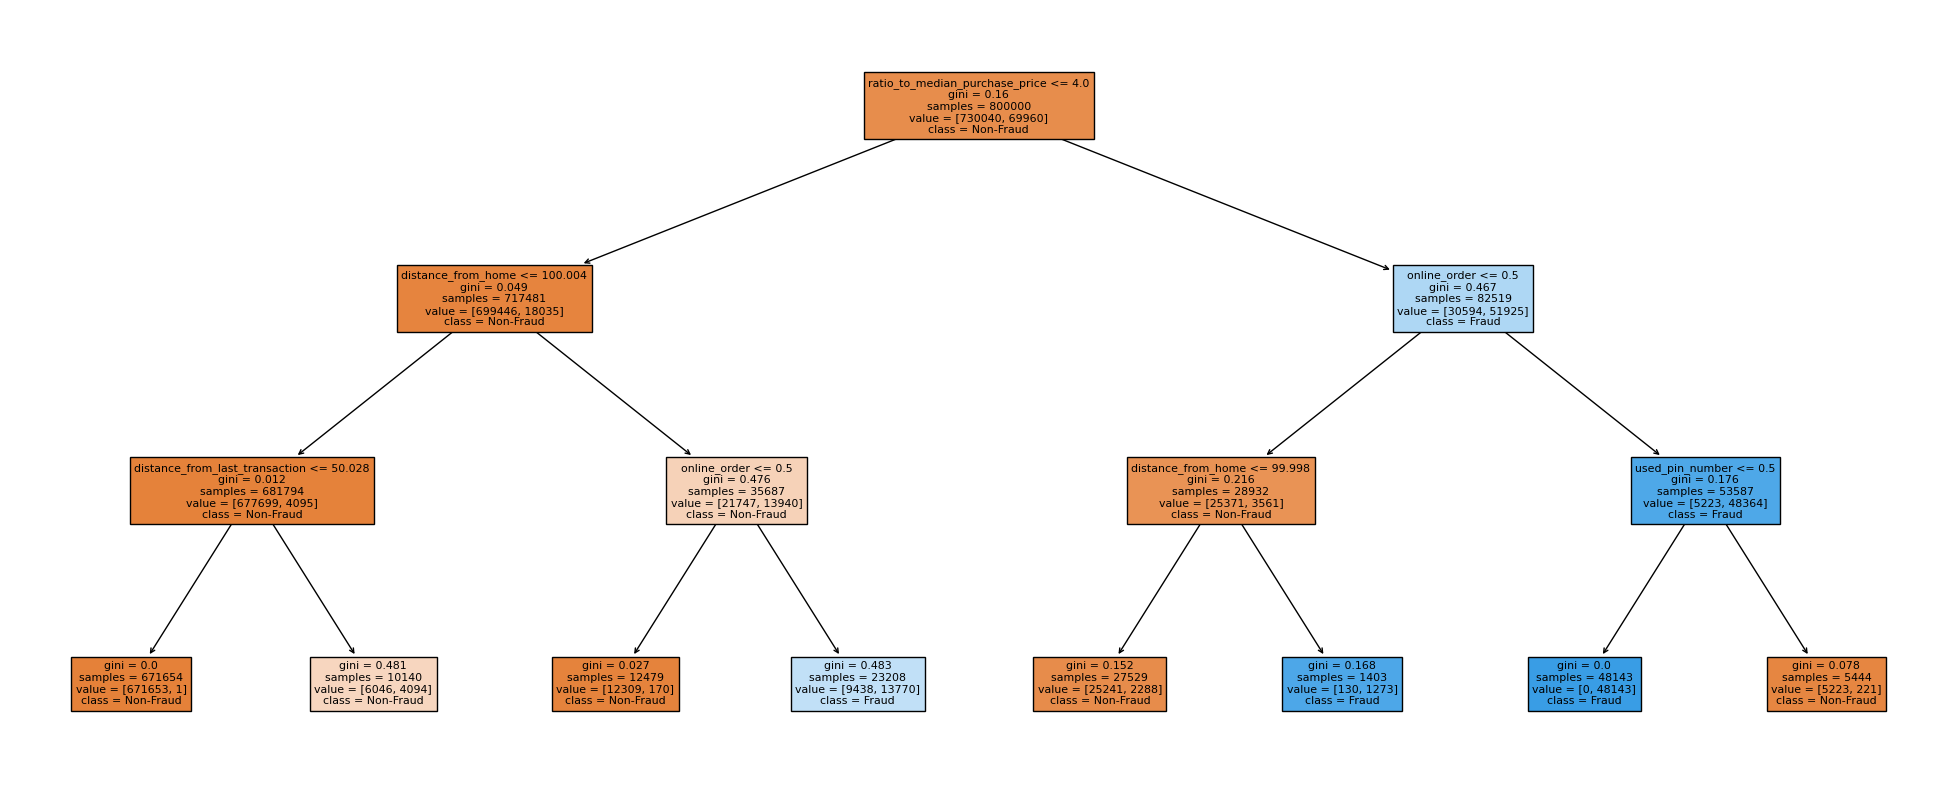

           Model  Accuracy    Recall  Precision
0  Decision Tree  0.979365  0.905635   0.864263
1  Random Forest  0.999990  0.999885   1.000000


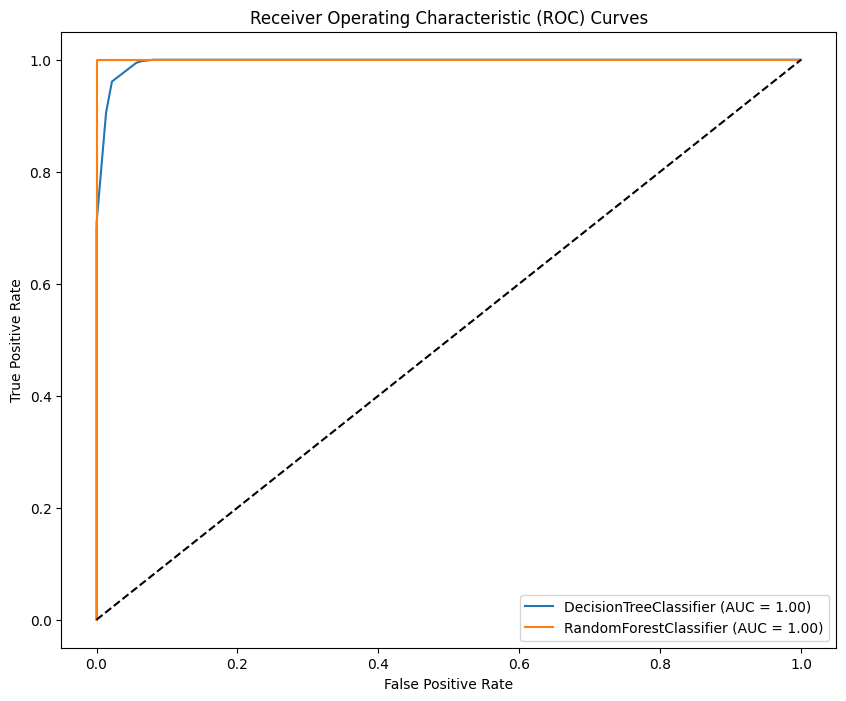

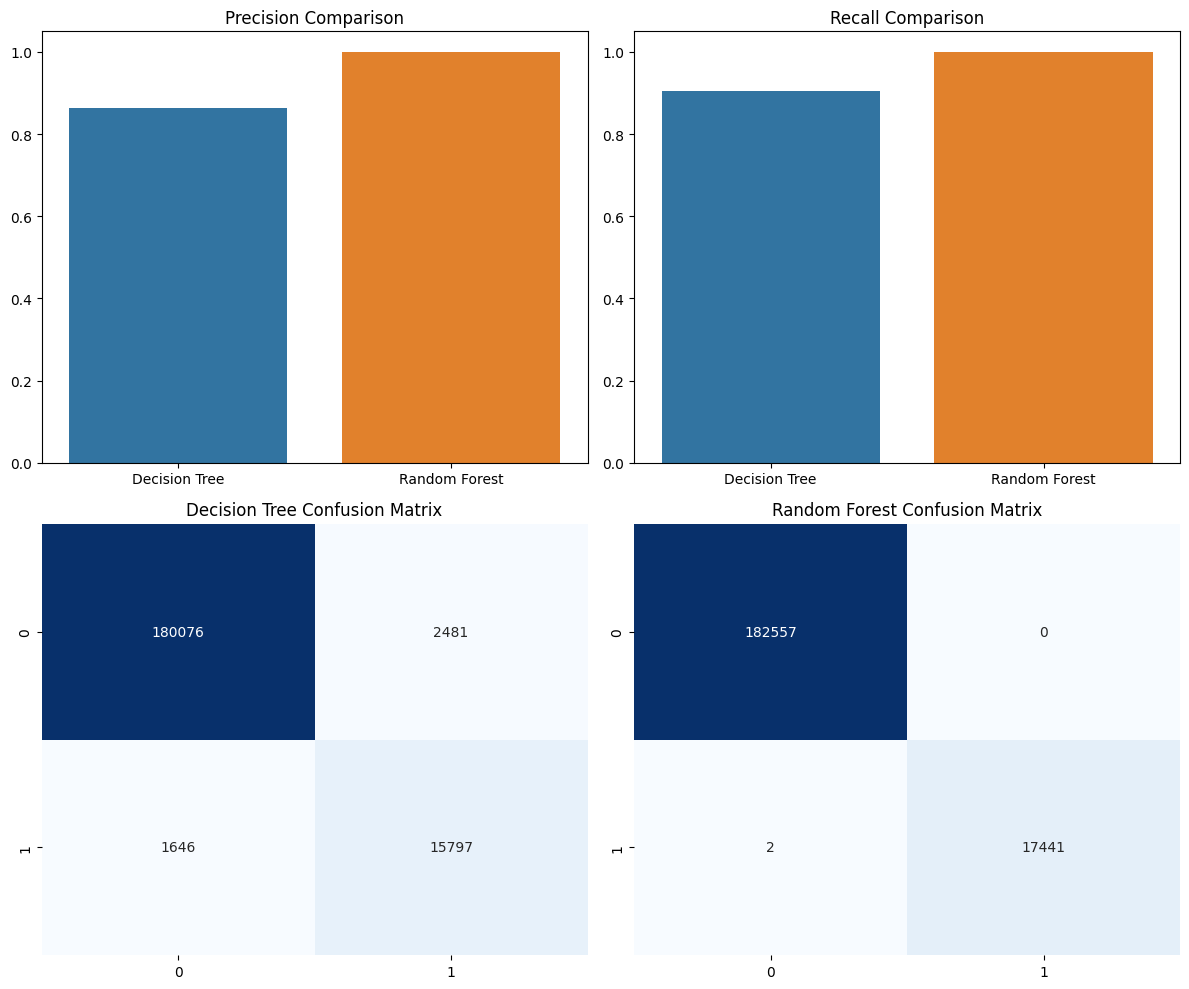

In [14]:
# Comparative Analysis of Fraud Detection Models
# Date: 13 Jan 2024
# Author: Prasad S Anvekar

####################
#Data upload
####################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

#####################
#Data Exploration
#####################
# Print the top and bottom 5 rows
print(data.head(5))
print("")

# Summary statistics
print(data.describe())

# Event rate
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Analysis specific to the target variable 'default'
missing_values_target = missing_values['fraud']
missing_percentage_target = missing_percentage['fraud']

# Preparing the analysis output for the entire dataset and for the target variable
missing_data_analysis = pd.DataFrame({
    'Feature': data.columns,
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data_analysis_target = pd.DataFrame({
    'Feature': ['fraud'],
    'Missing Values': [missing_values_target],
    'Percentage (%)': [missing_percentage_target]
})

# To display the analysis results
print("Missing Data Analysis for the Entire Dataset:")
print(missing_data_analysis)
print("\nMissing Data Analysis for the Target Variable 'fraud':")
print(missing_data_analysis_target)


# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Box plot visualization
print("\n--- Box Plots for Each Numeric Column ---")
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#####################
#Random Forest Model
#####################

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize a classification model (in this case, a Random Forest classifier)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the classifier on the training data
classifier.fit(X_train, y_train)

#Make prediction on the test data
y_pred_rf = classifier.predict(X_test)

#Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

#Print the results
print(f"Accuracy for Random Forest Model: {accuracy_rf: .4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print("Confusion Matrix for Random Forest Model:")
print(confusion_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()
print("Classification Report for Random Forest Model:")
print(classification_rep_rf)

####################
# Decision Tree Model
####################

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
confusion = confusion_matrix(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred_dt)

# Print the results
print(f"Accuracy for Decision Tree: {accuracy:.4f}")
print(f"Decision Tree - Recall: {recall:.4f}")
print(f"Decision Tree - Precision: {precision:.4f}")
print("Confusion Matrix for Decision Tree:")
print(confusion)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()

print("Classification Report for Decision Tree:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

######################
# Model Comparison
######################
models = ['Decision Tree', 'Random Forest']
acc_scores = [accuracy, accuracy_rf]
recall_scores = [recall, recall_rf]
precision_scores = [precision, precision_rf]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': acc_scores,
    'Recall': recall_scores,
    'Precision': precision_scores
})
print(performance_df)

plt.figure(figsize=(10, 8))
for model in [model, classifier]:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

# Visualize the comparision using Bar Graph
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Precision Bar Chart
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[precision, precision_rf], ax=axes[0, 0])
axes[0, 0].set_title('Precision Comparison')

# Recall Bar Chart
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[recall, recall_rf], ax=axes[0, 1])
axes[0, 1].set_title('Recall Comparison')

# Confusion Matrix Heatmaps
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Confusion Matrix')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()
